In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [1]:
!ls "/content/drive/My Drive"

 ADTPI0756M_Q2_2017-18.pdf
'Aov (1).gsheet'
 Aov.csv
 Aov.gsheet
'Colab Notebooks'
 freight_miles.rar
'Fully functional loudspeaker is 3.docx'
 images
'images (1)'
'JD SALES EXECUTIVE.doc'
'MCom (M17) Semester -I-BFG 101book_24092015(1).doc'
 NF2202031202085.pdf
 Python
 test
 train
 validation


In [0]:
mypath = '/content/drive/My Drive/images (1)/'

In [0]:
from os import listdir
from os.path import isfile, join

In [4]:
file_names = [f for f in listdir(mypath) if isfile(join(mypath, f))]

print(str(len(file_names)) + ' images loaded')

3003 images loaded


In [5]:
print(file_names)

['dog.1449.jpg', 'dog.145.jpg', 'dog.1450.jpg', 'dog.1452.jpg', 'dog.1453.jpg', 'dog.1451.jpg', 'dog.1454.jpg', 'dog.1455.jpg', 'dog.1456.jpg', 'dog.1457.jpg', 'dog.1459.jpg', 'dog.1458.jpg', 'dog.146.jpg', 'dog.1462.jpg', 'dog.1461.jpg', 'dog.1463.jpg', 'dog.1460.jpg', 'dog.1464.jpg', 'dog.1465.jpg', 'dog.1467.jpg', 'dog.1466.jpg', 'dog.147.jpg', 'dog.1468.jpg', 'dog.1471.jpg', 'dog.1470.jpg', 'dog.1469.jpg', 'dog.1473.jpg', 'dog.1472.jpg', 'dog.1474.jpg', 'dog.1475.jpg', 'dog.1476.jpg', 'dog.1477.jpg', 'dog.1478.jpg', 'dog.1479.jpg', 'dog.1481.jpg', 'dog.1480.jpg', 'dog.148.jpg', 'dog.1482.jpg', 'dog.1483.jpg', 'dog.1484.jpg', 'dog.1485.jpg', 'dog.1486.jpg', 'dog.1491.jpg', 'dog.1490.jpg', 'dog.1488.jpg', 'dog.149.jpg', 'dog.1489.jpg', 'dog.1487.jpg', 'dog.1492.jpg', 'dog.1494.jpg', 'dog.1493.jpg', 'dog.1495.jpg', 'dog.1496.jpg', 'dog.1497.jpg', 'dog.15.jpg', 'dog.150.jpg', 'dog.1498.jpg', 'dog.1499.jpg', 'dog.1500.jpg', 'dog.152.jpg', 'dog.153.jpg', 'dog.155.jpg', 'dog.151.jpg', 'do

In [0]:
import cv2
import numpy as np
import sys
import os
import shutil

In [7]:
# Extract 1000 for our training data and 500 for our validation set
# Takes about ~20 seconds to run
dog_count = 0
cat_count = 0
training_size = 1000
test_size = 500
training_images = []
training_labels = []
test_images = []
test_labels = []
size = 150
dog_dir_train = "./datasets/catsvsdogs/train/dogs/"
cat_dir_train = "./datasets/catsvsdogs/train/cats/"
dog_dir_val = "./datasets/catsvsdogs/validation/dogs/"
cat_dir_val = "./datasets/catsvsdogs/validation/cats/"

def make_dir(directory):
        if os.path.exists(directory):
            shutil.rmtree(directory)
        os.makedirs(directory)

make_dir(dog_dir_train)
make_dir(cat_dir_train)
make_dir(dog_dir_val)
make_dir(cat_dir_val)

def getZeros(number):
    if(number > 10 and number < 100):
        return "0"
    if(number < 10):
        return "00"
    else:
        return ""

for i, file in enumerate(file_names):
    
    if file_names[i][0] == "d":
        dog_count += 1
        image = cv2.imread(mypath+file)
        image = cv2.resize(image, (size, size), interpolation = cv2.INTER_AREA)
        if dog_count <= training_size:
            training_images.append(image)
            training_labels.append(1)
            zeros = getZeros(dog_count)
            cv2.imwrite(dog_dir_train + "dog" + str(zeros) + str(dog_count) + ".jpg", image)
        if dog_count > training_size and dog_count <= training_size+test_size:
            test_images.append(image)
            test_labels.append(1)
            zeros = getZeros(dog_count-1000)
            cv2.imwrite(dog_dir_val + "dog" + str(zeros) + str(dog_count-1000) + ".jpg", image)
            
    if file_names[i][0] == "c":
        cat_count += 1
        image = cv2.imread(mypath+file)
        image = cv2.resize(image, (size, size), interpolation = cv2.INTER_AREA)
        if cat_count <= training_size:
            training_images.append(image)
            training_labels.append(0)
            zeros = getZeros(cat_count)
            cv2.imwrite(cat_dir_train + "cat" + str(zeros) + str(cat_count) + ".jpg", image)
        if cat_count > training_size and cat_count <= training_size+test_size:
            test_images.append(image)
            test_labels.append(0)
            zeros = getZeros(cat_count-1000)
            cv2.imwrite(cat_dir_val + "cat" + str(zeros) + str(cat_count-1000) + ".jpg", image)

    if dog_count == training_size+test_size and cat_count == training_size+test_size:
        break

print("Training and Test Data Extraction Complete")

Training and Test Data Extraction Complete


In [0]:
np.savez('cats_vs_dogs_training_data.npz', np.array(training_images))
np.savez('cats_vs_dogs_training_labels.npz', np.array(training_labels))
np.savez('cats_vs_dogs_test_data.npz', np.array(test_images))
np.savez('cats_vs_dogs_test_labels.npz', np.array(test_labels))

In [0]:
import numpy as np

def load_data_training_and_test(datasetname):
    
    npzfile = np.load(datasetname + "_training_data.npz")
    train = npzfile['arr_0']
    
    npzfile = np.load(datasetname + "_training_labels.npz")
    train_labels = npzfile['arr_0']
    
    npzfile = np.load(datasetname + "_test_data.npz")
    test = npzfile['arr_0']
    
    npzfile = np.load(datasetname + "_test_labels.npz")
    test_labels = npzfile['arr_0']

    return (train, train_labels), (test, test_labels)

In [0]:
import cv2
from google.colab.patches import cv2_imshow

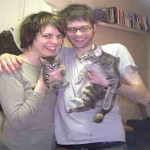

1 - Cat


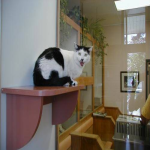

2 - Cat


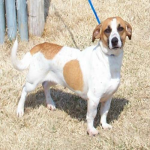

3 - Dog


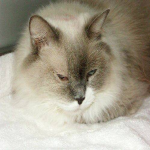

4 - Cat


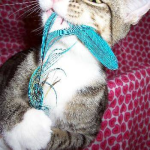

5 - Cat


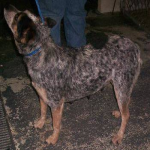

6 - Dog


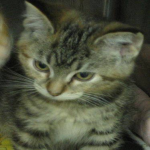

7 - Cat


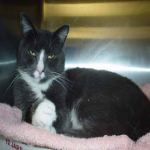

8 - Cat


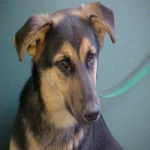

9 - Dog


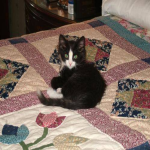

10 - Cat


In [20]:
for i in range(1,11):
    random = np.random.randint(0, len(training_images))
    cv2_imshow(training_images[random])
    if training_labels[random] == 0:
        print(str(i) + " - Cat")
    else:
        print(str(i)+ " - Dog")
    cv2.waitKey(0)
    
cv2.destroyAllWindows()

In [0]:
(x_train, y_train), (x_test, y_test) = load_data_training_and_test("cats_vs_dogs")

In [0]:
y_train = y_train.reshape(y_train.shape[0], 1)
y_test = y_test.reshape(y_test.shape[0], 1)

In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [0]:
x_train /= 255
x_test /= 255

In [28]:

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2000, 150, 150, 3)
(2000, 1)
(1000, 150, 150, 3)
(1000, 1)


In [29]:
from __future__ import print_function
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

Using TensorFlow backend.


In [0]:
batch_size = 16
epochs = 25

In [0]:
img_rows = x_train[0].shape[0]
img_cols = x_train[1].shape[0]
input_shape = (img_rows, img_cols, 3)

In [32]:
print(input_shape)

(150, 150, 3)


In [33]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


In [0]:
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [0]:
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [36]:
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [37]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

print(model.summary())



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 32)        0         
________________________

In [38]:
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test),
          shuffle=True)




Train on 2000 samples, validate on 1000 samples
Epoch 1/25





2000/2000 [==============================] - 60s 30ms/step - loss: 0.6945 - acc: 0.4900 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 2/25
2000/2000 [==============================] - 59s 29ms/step - loss: 0.6933 - acc: 0.4890 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 3/25
2000/2000 [==============================] - 59s 30ms/step - loss: 0.6932 - acc: 0.4980 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 4/25
2000/2000 [==============================] - 59s 29ms/step - loss: 0.6933 - acc: 0.4970 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 5/25
2000/2000 [==============================] - 59s 29ms/step - loss: 0.6932 - acc: 0.4910 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 6/25
2000/2000 [==============================] - 59s 29ms/step - loss: 0.6933 - acc: 0.4885 - val_loss: 0.6932 - val_acc: 0.5000
Epoch 7/25
2000/2000 [==============================] - 59s 29ms/step - loss: 0.6932 - acc: 0.4940 - val_loss: 0.6931 - val_acc:

In [39]:
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

1000/1000 [==============================] - 7s 7ms/step
Test loss: 0.6931495070457458
Test accuracy: 0.5


In [0]:
input_shape = (150, 150, 3)
img_width = 150
img_height = 150

nb_train_samples = 2000
nb_validation_samples = 1000
batch_size = 16
epochs = 25

train_data_dir = './datasets/catsvsdogs/train'
validation_data_dir = './datasets/catsvsdogs/validation'

In [47]:
train_datagen = ImageDataGenerator(
      rescale = 1./255,              # normalize pixel values to [0,1]
      rotation_range = 30,           # randomly applies rotations
      width_shift_range = 0.3,       # randomly applies width shifting
      height_shift_range = 0.3,      # randomly applies height shifting
      horizontal_flip = True,        # randonly flips the image
      fill_mode = 'nearest')         # uses the fill mode nearest to fill gaps created by the above
validation_datagen = ImageDataGenerator(
    # used to rescale the pixel values from [0, 255] to [0, 1] interval
    rescale = 1./255)

# Specify criteria about our training data, such as the directory, image size, batch size and type 
# automagically retrieve images and their classes for train and validation sets
train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size = (img_width, img_height),
        batch_size = batch_size,
        class_mode = 'binary',
        shuffle = True)

validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size = (img_width, img_height),
        batch_size = batch_size,
        class_mode = 'binary',
        shuffle = False)    

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [48]:
# Creating out model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

print(model.summary())

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_6 (Activation)    (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_7 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 64)       

In [0]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = nb_train_samples // batch_size,
    epochs = epochs,
    validation_data = validation_generator,
    validation_steps = nb_validation_samples // batch_size)

Epoch 1/25
125/125 [==============================] - 71s 570ms/step - loss: 0.7001 - acc: 0.4995 - val_loss: 0.6863 - val_acc: 0.4960
Epoch 2/25
125/125 [==============================] - 69s 553ms/step - loss: 0.6887 - acc: 0.5450 - val_loss: 0.7198 - val_acc: 0.4949
Epoch 3/25
125/125 [==============================] - 69s 553ms/step - loss: 0.6772 - acc: 0.5855 - val_loss: 0.6486 - val_acc: 0.6291
Epoch 4/25
125/125 [==============================] - 69s 554ms/step - loss: 0.6706 - acc: 0.6005 - val_loss: 0.6239 - val_acc: 0.6382
Epoch 5/25
125/125 [==============================] - 70s 563ms/step - loss: 0.6516 - acc: 0.6160 - val_loss: 0.6375 - val_acc: 0.6626
Epoch 6/25
125/125 [==============================] - 70s 564ms/step - loss: 0.6524 - acc: 0.6280 - val_loss: 0.6092 - val_acc: 0.6768
Epoch 7/25
125/125 [==============================] - 71s 565ms/step - loss: 0.6512 - acc: 0.6295 - val_loss: 0.6076 - val_acc: 0.6819
Epoch 8/25
125/125 [==============================] - 7